In [1]:
import os
os.chdir('../..')

In [2]:
import comet_ml
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

from FLF.TorchFederatedLearnerCIFAR100 import TorchFederatedLearnerCIFAR100Config, TorchFederatedLearnerCIFAR100
from FLF.TorchFederatedLearner import TorchFederatedLearnerTechnicalConfig

In [3]:
class Empty:
    def __getattribute__(self, key):
        return empty
    
def empty(*args, **kwargs):
    return None

In [4]:
learner = TorchFederatedLearnerCIFAR100(
    Empty(), 
    TorchFederatedLearnerCIFAR100Config(
        N_CLIENTS=500,
        IS_IID_DATA=False, 
        IMAGE_NORM="recordwise",
        SHUFFLE=False,
        AUG="basic"
    ), 
    TorchFederatedLearnerTechnicalConfig())

In [5]:
dl = learner.clients[0].dataloader

In [6]:
b = next(iter(dl))

In [7]:
data, target = b

In [8]:
data.shape, target.shape

(torch.Size([64, 3, 24, 24]), torch.Size([64]))

In [9]:
data.mean(), data.std(), data.min(), data.max()

(tensor(-4.3203e-08), tensor(0.9991), tensor(-5.1055), tensor(4.8324))

In [10]:
img = transforms.ToPILImage()((data[4, ] + 1)/ 2)

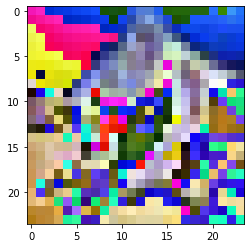

In [11]:
plt.imshow(transforms.RandomHorizontalFlip()(img))

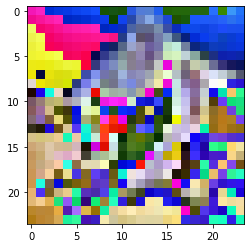

In [12]:
plt.imshow(transforms.RandomVerticalFlip()(img))

In [13]:
target

tensor([44, 33, 75, 27, 49, 29, 33, 49, 60, 93, 49, 60, 93, 60, 63, 63, 60, 60,
        71, 60, 29, 23, 63, 71, 34, 33, 33, 71, 23, 93, 33, 63, 44, 34, 88, 44,
        49, 23, 93, 34, 93, 27, 15, 60, 21, 71, 23, 75, 49, 63, 49, 77, 75, 71,
        93, 49, 29,  0, 23, 99, 29, 45, 93, 93])

In [14]:
for i, d in dl:
    print(d)

tensor([93, 63, 64, 60, 49, 75, 21, 23, 33, 99, 60, 33, 33, 77, 49, 60, 45, 99,
        93, 71, 34, 51, 93, 34, 33, 71, 44, 93, 71, 45, 29, 27, 49, 27, 44, 33,
         0, 23, 93, 93, 27, 49, 44, 49, 75, 75, 23, 29, 29, 44, 27, 23, 63, 63,
        38, 49, 45, 23, 33, 71, 77, 33, 60, 49])
tensor([23, 23, 93, 71, 93, 29, 33, 33, 27, 93, 33, 63, 49, 33, 71, 15, 88, 51,
        93, 71, 60, 60, 34, 60, 29, 75, 49, 60, 33, 63, 49, 93, 23, 29, 71, 34])
